# Headless CSV file
This notebook shows how to fit a Fermi diad from a CSV file collected at a wide range of wavenumbers


In [1]:
# Importing numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing DiadFit after its installed. If its not installed, see paper for installation instructions
import DiadFit as pf

## Specify path to folder with your spectra in

In [2]:
# Add the path with your spectra in
mypath=r'/Users/kyledayton/Documents/Python Codes/DiadFit-main 0.0.11/docs/Examples/Diad_Fitting/LP LM FI DENSITY ERROR SPECTRA'

## Specify your file type, options:
- 'headless_txt',
-'Witec_ASCII'
- 'Renishaw_txt'
- 'HORIBA_txt'
- 'headless_csv'

In [3]:
filetype='headless_txt'
# Specifying the extension here helps to filter out other file types,
# e.g. png files that may be in the folder
file_ext='.txt'
# If your instrument appends a nubmer like 01, 02 to each file, True removes it
prefix=False

## This function finds all files in your path with the specified file format

In [4]:
Diad_files=pf.get_diad_files(path=mypath, file_ext=file_ext)
Diad_files

exclude type
.png


['01 NE 1.txt',
 '02 LP LM6 G3 FI1 1.txt',
 '03 NE 2.txt',
 '04 LP LM6 G3 FI1 2.txt',
 '05 NE 3.txt',
 '06 LP LM6 G3 FI1 3.txt',
 '07 NE 4.txt',
 '08 LP LM6 G3 FI1 4.txt',
 '09 NE 5.txt',
 '10 LP LM6 G3 FI1 5.txt',
 '11 NE 6.txt',
 '12 LP LM6 G3 FI1 6.txt',
 '13 NE 7.txt',
 '14 LP LM6 G3 FI1 7.txt',
 '15 NE 8.txt',
 '16 LP LM6 G3 FI1 8.txt',
 '17 NE 9.txt',
 '18 LP LM6 G3 FI1 9.txt',
 '19 NE 10.txt',
 '20 LP LM6 G3 FI1 10.txt',
 '21 NE 11.txt',
 '22 LP LM6 G3 FI1 11.txt',
 '23 NE 12.txt',
 '24 LP LM6 G3 FI1 12.txt',
 '25 NE 13.txt',
 '26 LP LM6 G3 FI1 13.txt',
 '27 NE 14.txt',
 '28 LP LM6 G3 FI1 14.txt',
 '29 NE 15.txt',
 '30 LP LM6 G3 FI1 15.txt',
 '31 NE 16.txt',
 '32 LP LM6 G3 FI1 16.txt',
 '33 NE 17.txt',
 '34 LP LM6 G3 FI1 17.txt',
 '35 NE 18.txt',
 '36 LP LM6 G3 FI1 18.txt',
 '37 NE 19.txt']

## Select file here OR specify file name
- Here we select the 1st file in the folder [0], if you wanted to target a specific file, you can do that by uncommenting the line below. 

In [182]:
filename='36 LP LM6 G3 FI1 18.txt' # or put ='FG04_10_MI1_2.txt'
#filename='WITEC_ASCII_MS14_11_MI1_50X.txt'
print(filename)

36 LP LM6 G3 FI1 18.txt


## Now plot the spectra to inspect what is going on
- By default, DiadFit adds the positions of some common phases in bubbles 

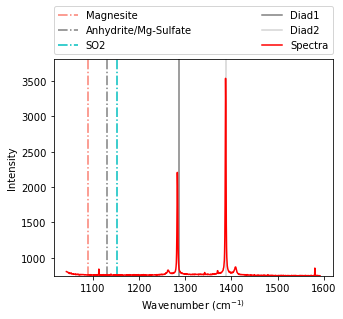

In [183]:
pf.plot_spectra(path=mypath, filename=filename, filetype=filetype)
plt.savefig('plot_diad_example.png', dpi=200)

## After inspecting the spectra, decide if you want to fit the carbonate peak
- If yes, select fit_carbonate=True, else fit_Carbonate=False
- We can see above there is no carbonate, so we select false

In [184]:
fit_carbonate=False
# Exclude a range here, e.g. if you have a nasty Cosmic ray
exclude_range=None#[1080, 1088]
# This selects the two background positions
lower_range=[1068, 1075]
upper_range=[1120, 1130]
# Tweak degree of poylnomial fitting the background
N_poly=1
# This sets the peak center, you can tweak if needed
cent=1090
# Amplitude, may need to tweak
amplitude=1000

# Select sigma level, e.g. discard points in background N* sigma outside mean
outlier_sigma=12
# N PEAKS - if you want approx peak positionYs
N_peaks=3

# This actually does the work and fits the carbonate peak
# You can tweak the other parameters such as the distance, prominence in the function
Carb_fit=pf.fit_carbonate_peak(path=mypath, 
filename=filename, filetype=filetype,
lower_range=lower_range, upper_range=upper_range, 
cent=cent, exclude_range=exclude_range,
N_poly=N_poly, outlier_sigma=outlier_sigma, 
N_peaks=N_peaks, amplitude=amplitude,
distance = 10, prominence=5, width=6, 
threshold=0.1, fit_carbonate=fit_carbonate)
Carb_fit


## Now lets plot the diads
- As with carbonate, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

Initial estimates: Diad1+HB=[1282.6 1262.6], Diad2+HB=[1387.2 1408.9]


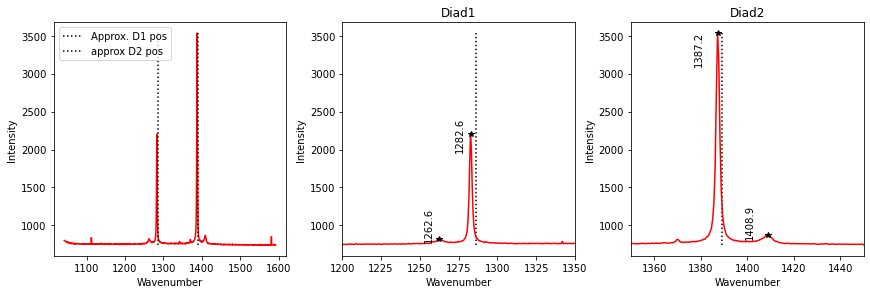

In [185]:
# Exclude a range
exclude_range1=None #[1290, 1300]
exclude_range2=None #[1390, 1400]
# Specify the number of peaks
n_peaks_diad1=2
n_peaks_diad2=2
# 
diad1_peaks, diad2_peaks=pf.identify_diad_peaks(path=mypath, filename=filename,
filetype=filetype, n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2,                                      
exclude_range1=exclude_range1,  exclude_range2=exclude_range2,
height = 400, threshold = 0.5, distance = 5, prominence=10, width=0.5)

## If you have no diads visible...
- Uncomment this line, and it will just save the carbonate peak parameters

In [186]:
#pf.proceed_to_fit_diads(filename, Carb_fit)

## Fit Diad 1
- This function uses the guess of the peak parameters above. You can choose to fit a gaussian background. Else, use a polynomial and specify background positions
- If plot_figure=True, it saves the figure in its own folder in the path, so you can inspect all the fits at a later date. 

Gauss_cent=1279.9999997425728
Gauss_amp=525.5690450125433
Gauss_sigma=9.99999976495452


,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual_Diad1
0,1282.774136,3849.091896,1262.489486,441.664998,3.546307


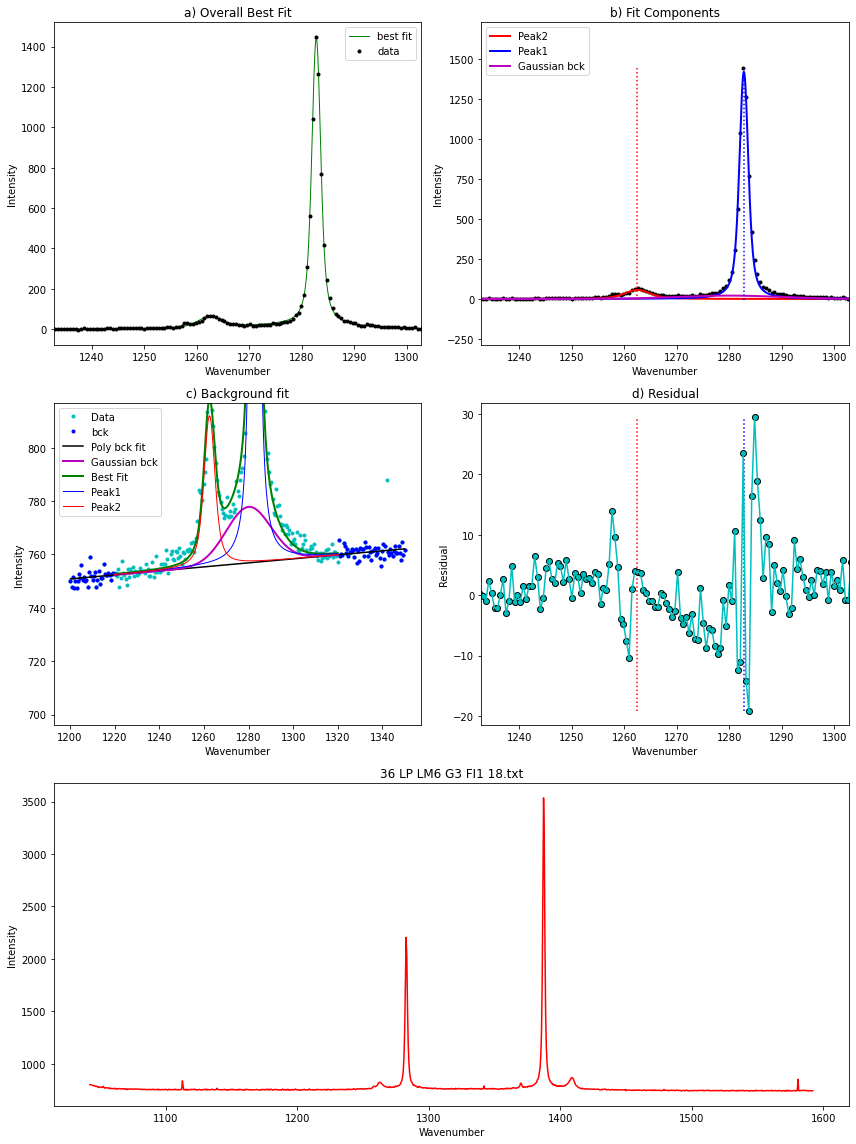

In [187]:
# If you put a number in brackets, it'll center a gaussian near there. 
peak_pos_gauss=(1250)
# Degree of polynomial for the background
N_poly_bck_diad1=1
# LH range to use as baseline for the diad
lower_baseline_diad1=[1200, 1220]
# RH range to use as baseline for the diad
upper_baseline_diad1=[1320, 1350]
## Amplitude may need tweaking if you don't get a good match
amplitude=1000
# Do you want to save the figure?
plot_figure=True
# This function does the work fitting the diad
Diad1_fit=pf.fit_diad_1_w_bck(
path=mypath, filename=filename, filetype=filetype,
exclude_range1=exclude_range1, exclude_range2=exclude_range2,
N_poly_bck_diad1=N_poly_bck_diad1, lower_baseline_diad1=lower_baseline_diad1,
upper_baseline_diad1=upper_baseline_diad1,
peak_pos_voigt=diad1_peaks, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude,
plot_figure=plot_figure)
Diad1_fit

In [188]:
Diad1_fit

,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual_Diad1
0,1282.774136,3849.091896,1262.489486,441.664998,3.546307


## Fit diad 2

1387.3354872925006
<Parameter 'sigma', value=0.5379773955266394 +/- 0.00462, bounds=[0:inf]>
Fitting 2 voigt peaks iteratively 
working on voigt peak0
working on voigt peak1
Error bars not determined by function
Gauss_cent=1390.0000000033026
Gauss_amp=999.9999999999787
Gauss_sigma=13.190707710266025
made df
/Users/kyledayton/Documents/Python Codes/DiadFit-main 0.0.11/docs/Examples/Diad_Fitting/LP LM FI DENSITY ERROR SPECTRA


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area,Residual_Diad2
0,1387.334884,6926.661227,1408.70133,693.522249,4.705798


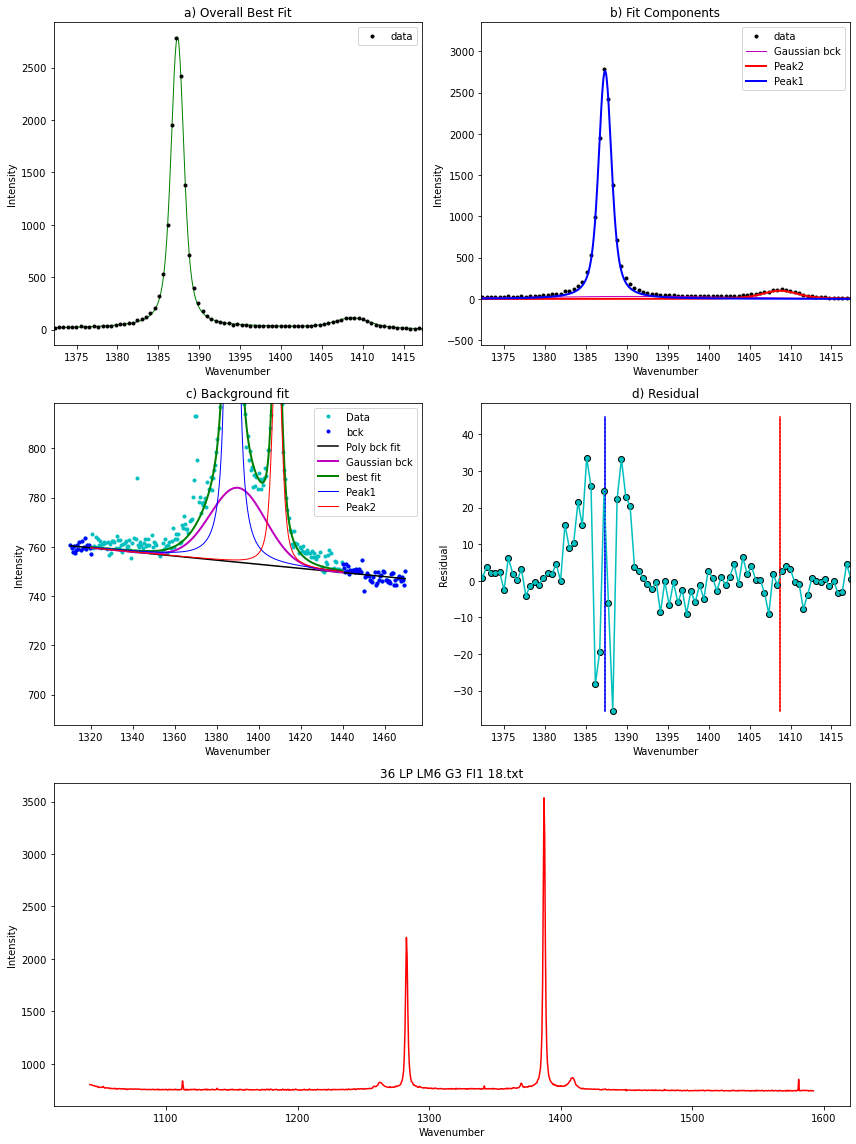

In [189]:
# Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=(1420)
# If need to adjust shape of gaussian, enter fwhm here
gauss_sigma=100
gauss_sigma_min=5
gauss_amp=1000
# Degree of polynomail for the background
N_poly_bck_diad2=1
# LH range to use as baseline for the diad
lower_baseline_diad2=[1310, 1320]
# RH range to use as baseline for the diad
upper_baseline_diad2=[1440, 1470]
# Tweak amplitude if needed
amplitude=100
# This then takes these inputs and feeds them into the function
Diad2_fit =pf.fit_diad_2_w_bck(path=mypath, filename=filename, filetype=filetype, peak_pos_voigt=diad2_peaks,
exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly_bck_diad2=N_poly_bck_diad2, 
lower_baseline_diad2=lower_baseline_diad2, upper_baseline_diad2=upper_baseline_diad2,
peak_pos_gauss=peak_pos_gauss, gauss_sigma=gauss_sigma,
gauss_amp=gauss_amp,                                                                         
amplitude=amplitude, plot_figure=True)
Diad2_fit

## Combine and copy to clipboard!

In [190]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, 
Diad1_fit=Diad1_fit, 
Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,36 LP LM6 G3 FI1 18,104.560748,1282.774136,3849.091896,3.546307,1387.334884,6926.661227,4.705798,1262.489486,441.664998,1408.70133,693.522249,NaN,0
